<a href="https://colab.research.google.com/github/negiamishhu/DL-and-ML-fusion-for-skin-disease-detection/blob/main/Mobile_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-layer-normalization
!pip install keras

  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=cd84f18b39d3f699c4763b5f2d1786ecd1a012fb83d412a36bd7e5376876ab08
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


In [ ]:
# prompt: gdrive mount code

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
#from keras_layer_normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Path to the directory containing folders of images
images_dir = "/content/drive/MyDrive/natural/train"

# Create lists to store image arrays (X) and labels (Y)
#SIZE = 128
SIZE = 224
train_images = []
train_labels = []

# Loop through each folder in the directory
for folder in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            #print(image_path)
            # Check if the item in the folder is a file and is an image
            if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read image as array
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (SIZE,SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                train_images.append(img)
                train_labels.append(folder)

train_images = np.array(train_images)
train_labels = np.array(train_labels)



print(train_labels)


['bkl' 'bkl' 'bkl' ... 'vasc' 'vasc' 'vasc']


In [ ]:
# Path to the directory containing folders of images
images_dir = "/content/drive/MyDrive/natural/test"

# Create lists to store image arrays (X) and labels (Y)
#SIZE = 128
SIZE = 224
test_images = []
test_labels = []

# Loop through each folder in the directory
for folder in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Check if the item in the folder is a file and is an image
            if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read image as array
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (SIZE,SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                test_images.append(img)
                test_labels.append(folder)

test_images = np.array(test_images)
test_labels = np.array(test_labels)



print(test_labels)

['nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'bcc' 'bcc' 'bcc'
 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'b

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network.
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
#############################
'''
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF
'''

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# prompt: WRite code to use mobilenet v3 as vgg16

from tensorflow.keras.applications import MobileNetV3Small
#Load model wothout classifier/fully connected layers
MobileNetV3_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in MobileNetV3_model.layers:
	layer.trainable = False

MobileNetV3_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=MobileNetV3_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF


4334752/4334752 [==============================] - 0s 0us/step
Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)          

# Extract feature from Mobilenet and train RF classifier

11/11 [==============================] - 4s 360ms/step
Accuracy =  0.6771428571428572
              precision    recall  f1-score   support

       akiec       0.60      0.78      0.68        50
         bcc       0.66      0.70      0.68        50
         bkl       0.61      0.38      0.47        50
          df       0.94      1.00      0.97        50
         mel       0.45      0.48      0.47        50
          nv       0.57      0.40      0.47        50
        vasc       0.83      1.00      0.91        50

    accuracy                           0.68       350
   macro avg       0.67      0.68      0.66       350
weighted avg       0.67      0.68      0.66       350

[[39  5  2  0  2  1  1]
 [ 4 35  1  0  7  2  1]
 [10  7 19  1  8  4  1]
 [ 0  0  0 50  0  0  0]
 [ 5  3  6  1 24  8  3]
 [ 7  3  3  1 12 20  4]
 [ 0  0  0  0  0  0 50]]
1/1 [==============================] - 0s 66ms/step
The prediction for this image is:  ['df']
The actual label for this image is:  df


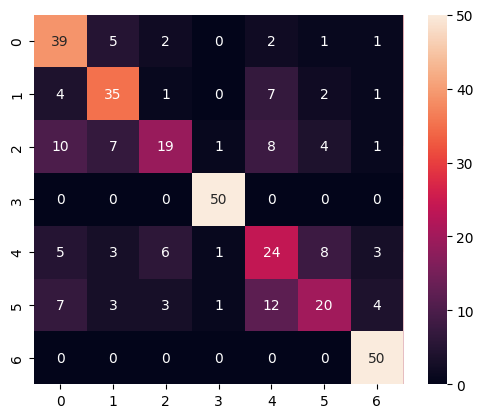

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
#X_test_feature = VGG_model.predict(x_test)
X_test_feature=MobileNetV3_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
# Generate a classification report
report = classification_report(test_labels, prediction_RF)

print(report)
print(confusion_matrix(test_labels, prediction_RF))

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=MobileNetV3_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 0s 263ms/step
The prediction for this image is:  ['df']
The actual label for this image is:  df


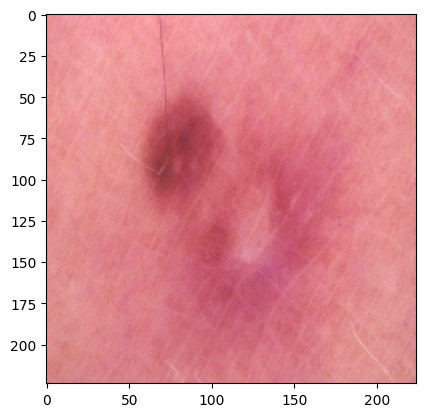

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=MobileNetV3_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

# Extract feature from Mobilenet and train Xgboost classifier

In [ ]:
# prompt: apply xgboost classifier after feature selection

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_test_feature = MobileNetV3_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
# Train the XGBoost classifier
model = XGBClassifier()
model.fit(X_for_RF, y_train)
#Now predict using the trained RF model.
prediction_RF = model.predict(X_test_features)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

'''
# Apply feature selection
selector = SelectKBest(chi2, k=10)
X_for_RF_selected = selector.fit_transform(X_for_RF, y_train)


# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process


#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_for_RF_selected, y_train, test_size=0.2, random_state=42)

# Train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)
'''
# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


11/11 [==============================] - 5s 406ms/step
Accuracy: 0.6914285714285714


              precision    recall  f1-score   support

       akiec       0.70      0.74      0.72        50
         bcc       0.63      0.68      0.65        50
         bkl       0.48      0.46      0.47        50
          df       0.93      1.00      0.96        50
         mel       0.53      0.52      0.53        50
          nv       0.79      0.44      0.56        50
        vasc       0.78      1.00      0.88        50

    accuracy                           0.69       350
   macro avg       0.69      0.69      0.68       350
weighted avg       0.69      0.69      0.68       350

[[37  3  7  1  1  0  1]
 [ 7 34  1  1  2  2  3]
 [ 3  9 23  0 10  3  2]
 [ 0  0  0 50  0  0  0]
 [ 3  5 12  0 26  1  3]
 [ 3  3  5  2 10 22  5]
 [ 0  0  0  0  0  0 50]]
1/1 [==============================] - 0s 183ms/step
The prediction for this image is:  ['df']
The actual label for this image is:  df


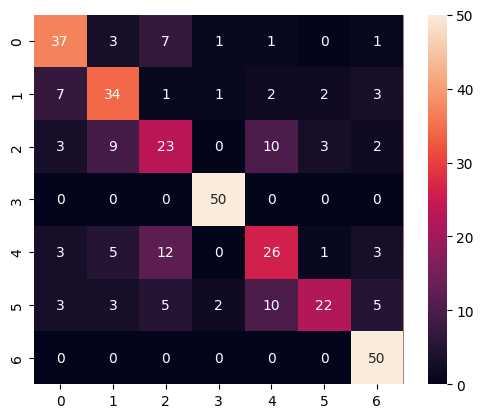

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
# Generate a classification report
report = classification_report(test_labels, prediction_RF)

print(report)
print(confusion_matrix(test_labels, prediction_RF))

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=MobileNetV3_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=MobileNetV3_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

NameError: name 'np' is not defined

#TRAIN MOBILENET AND THEN USE XGBOOST

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data preparation
data_dir = "/content/drive/MyDrive/natural/train" # Adjust this to your dataset path
val_dir= "/content/drive/MyDrive/natural/test"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # using 20% of the data for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1006 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load and preprocess the dataset
# Assume you have X_train, X_test, y_train, y_test already split and preprocessed

# Setting up the model with MobileNetV3 as a base
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Using small version for efficiency

# Freezing the base model layers
base_model.trainable = False

# Adding custom layers on top of MobileNetV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Final model setup
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model checkpoint to save the best weights
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Training the model
model.fit(train_generator, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


4334752/4334752 [==============================] - 0s 0us/step


NameError: name 'X_train' is not defined

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

# Remove the top layer to use as a feature extractor
base_model = Model(inputs=model.input, outputs=model.layers[-3].output)

# Extract features
features = base_model.predict(X_train)  # Assuming X_train is preprocessed similarly as for training

# Prepare data for XGBoost
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(features, y_train, test_size=0.2, random_state=42)

# Train XGBoost
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=7)
xgb_classifier.fit(X_train_feat, y_train_feat)

# Predict and evaluate
predictions = xgb_classifier.predict(X_test_feat)
print("Accuracy of XGBoost classifier on extracted features:", accuracy_score(y_test_feat, predictions))


In [ ]:
# Load MobileNetV3Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


In [ ]:
# Create a model for feature extraction
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('global_average_pooling2d').output)

# Extract features
features = feature_extractor.predict(train_generator)
labels = train_generator.classes

# Prepare labels for XGBoost (ensure they are flattened if one-hot encoded)
if len(labels.shape) > 1:
    labels = labels.argmax(axis=1)

# Split features
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train XGBoost
classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss')
classifier.fit(X_train, y_train)

# Predict and evaluate
predictions = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
